## csv to img

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('lasso_xangle_combi/CSV_data/IMG_ID401.csv')

image = df['PIXEL_COLOR'].values.reshape(69, 112)
plt.rc('axes',edgecolor='w')

# Create a square figure with subplots
fig, ax = plt.subplots(figsize=(11.5, 10.5))

# Plot the image on the single subplot
ax.imshow(image, cmap='gray', interpolation='nearest', origin='lower')

# Set the aspect ratio to 'auto'
ax.set_aspect('auto', adjustable='box')
ax.tick_params('both', length=7, width=2, which='major')

plt.xticks(np.arange(0, 112, 4), rotation=90)
plt.yticks(np.arange(0, 68, 4))
plt.xlabel('PIXEL_X', fontsize=20, labelpad=10)
plt.ylabel('PIXEL_Y', fontsize=20, labelpad=10)
plt.title(f'IMG_ID: {df.IMG_ID[0]}', fontsize=20, pad=15)
plt.show()

## no lasso

0
(108, -19)
(83, -9)
(12, 72)


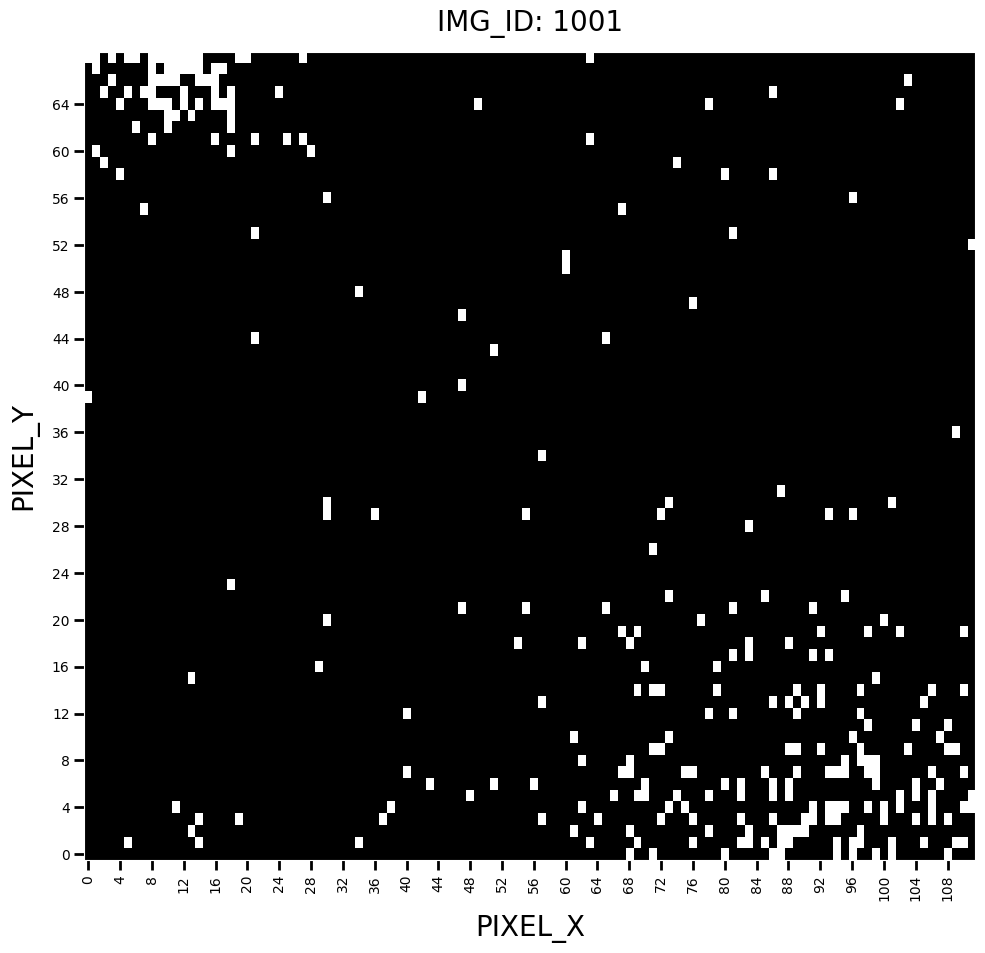

0
(79, 78)
(110, 0)


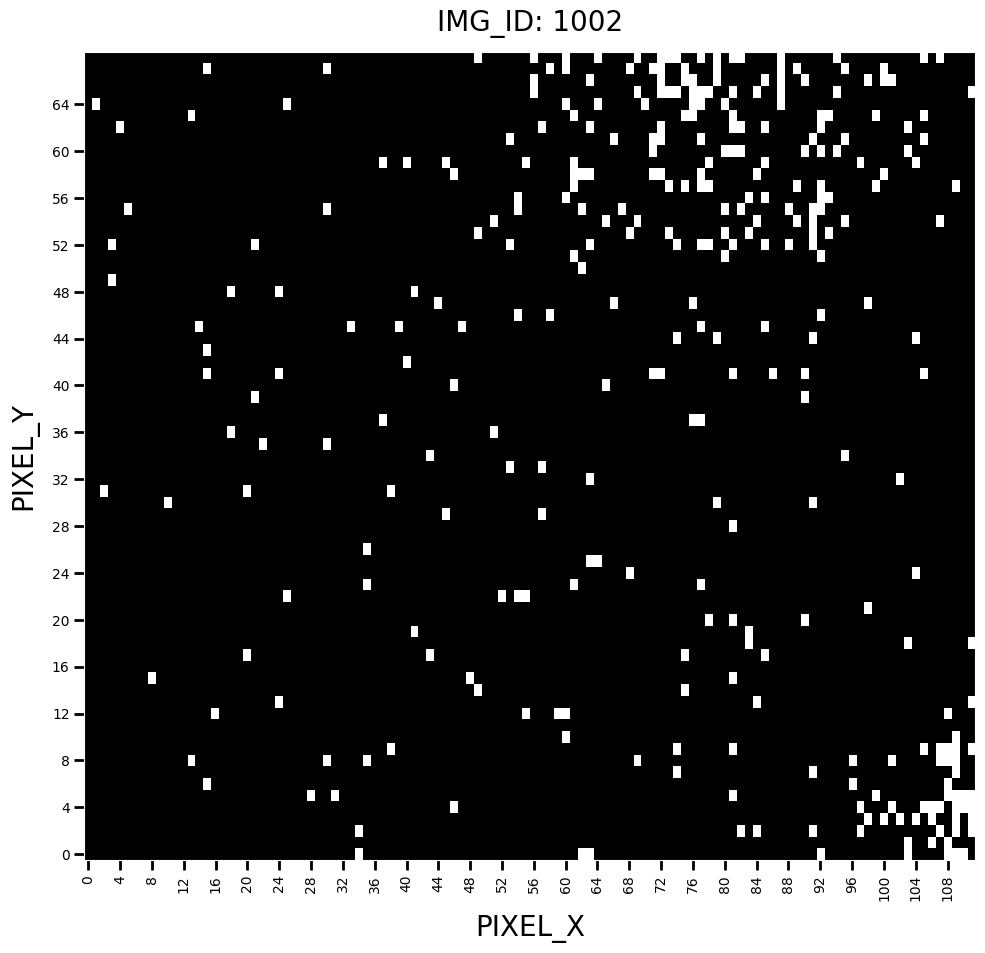

0
(82, -5)


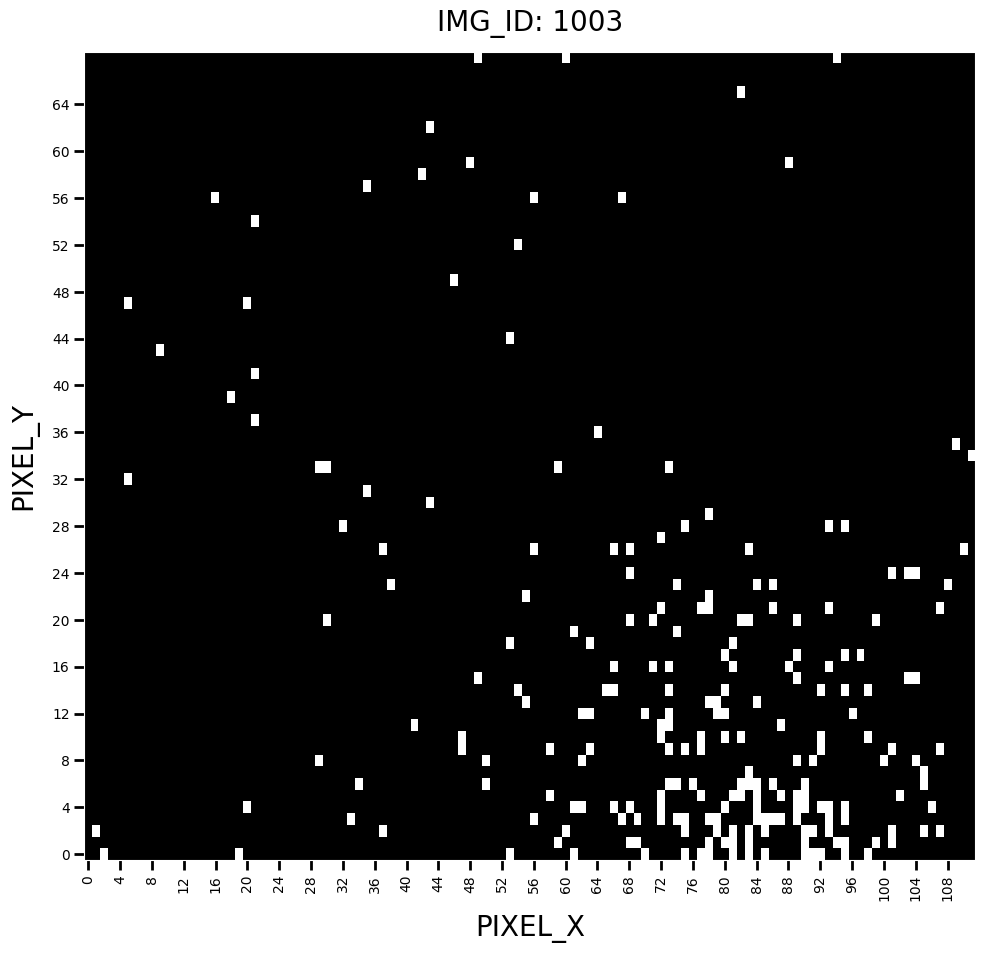

0
(128, 74)
(75, 75)
(56, -3)


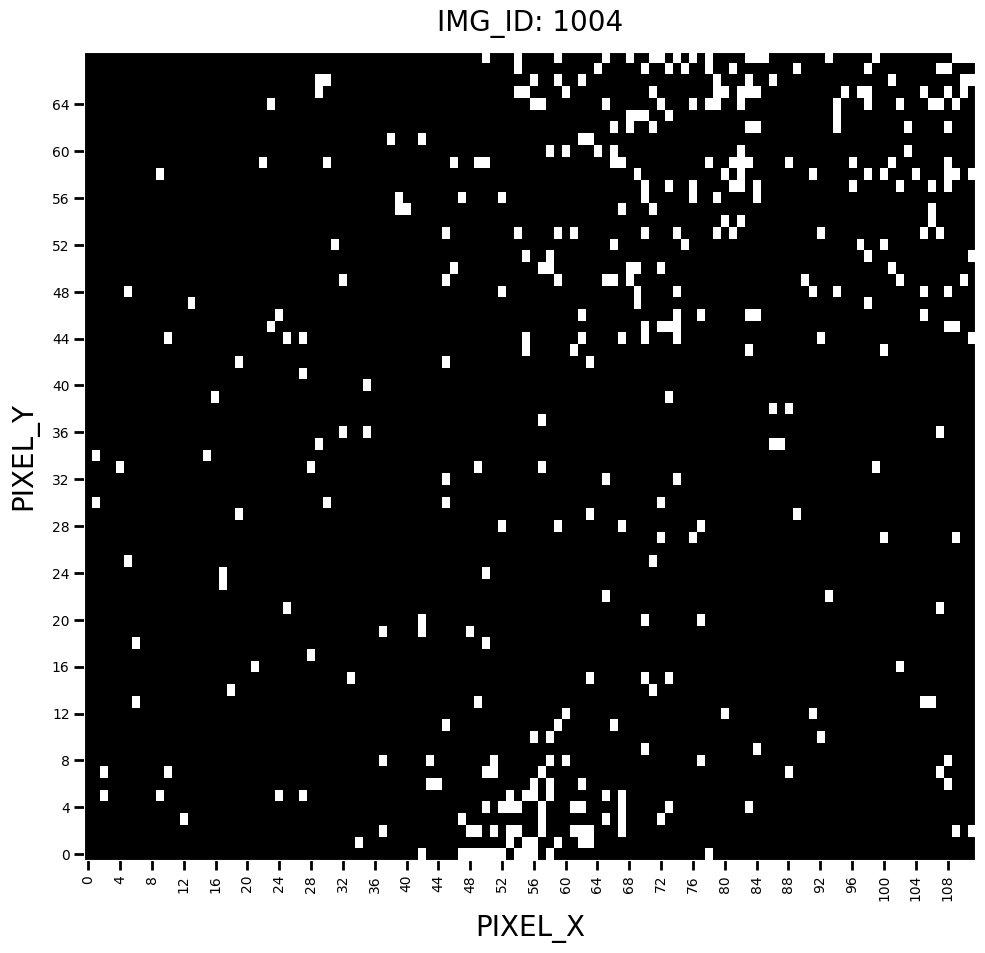

1
0
(120, 56)
(-1, 28)
(-5, 41)


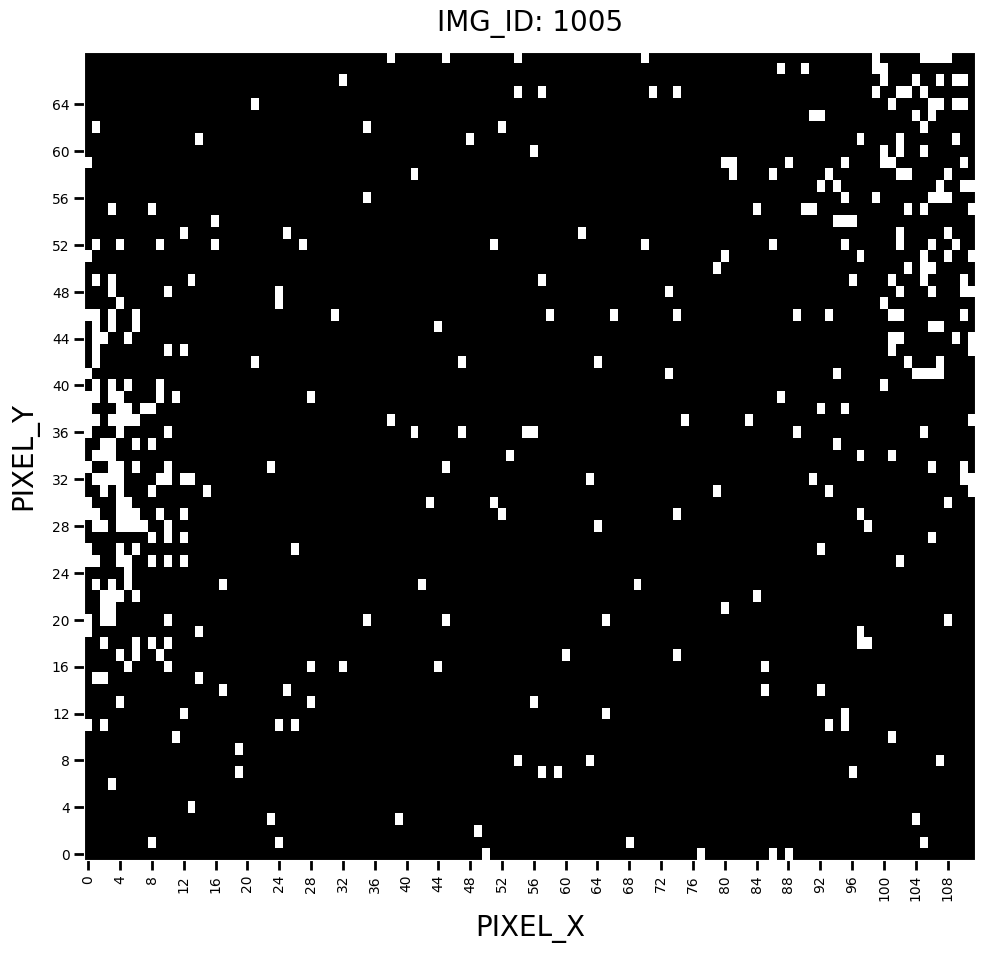

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
import time


for ID in range(5):

    info = {
        'White Percentage': [],
        'Stretch Coords': [],
        'Squeeze Coords': [],
        'Vertical Coords Start': [],
        'Vertical Coords End': [],
        'Horizontal Coords Start': [],
        'Horizontal Coords End': [],
        'Diagonal Coords Start': [],
        'Diagonal Coords End': [],
        'Combination Coords Start': [],
        'Combination Coords End': []
    }

    #working generate pixels and coordinates start from bottom left
    d = {'IMG_ID': [], 'PIXEL_X': [], 'PIXEL_Y': [], 'PIXEL_COLOR': []}
    df = pd.DataFrame(data=d)

    df['PIXEL_X'] = np.tile(range(112), 69)
    df['PIXEL_Y'] = np.repeat(range(69), 112)

    num_pixels = 112 * 69
    white_percentage = random.randint(1, 2) /100
    info['White Percentage'].append(white_percentage)
    num_white_pixels = int(white_percentage * num_pixels)
    df['PIXEL_COLOR'] = np.concatenate([np.zeros(num_pixels - num_white_pixels), 
                                        np.ones(num_white_pixels)])

    def check_3pixel():
        while True:
            df['PIXEL_COLOR'] = np.random.permutation(df['PIXEL_COLOR'])
            found = 0
            for y in range(69):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'] == y), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(112):
                    selected_values = df.loc[(df['PIXEL_Y'].between(y, y+2)) & 
                                    (df['PIXEL_X'] == x), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'].between(y, y+2)) &
                                    (df['PIXEL_X'] - df['PIXEL_Y'] == x - y), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'].between(y, y+2)) & 
                                    (df['PIXEL_X'] + df['PIXEL_Y'] == x + y + 2), 'PIXEL_COLOR']

                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1
            print(found)
            if found == 0:
                break

    check_3pixel()



    def generate_semiconductor_image(size_x, size_y, center, dispersion_factor, starting_intensity_factor):
        # Create a grid of coordinates
        x, y = np.meshgrid(np.arange(size_x), np.arange(size_y))
        
        # Calculate distances from the center
        distances = np.sqrt((x - center[0])**2 + (y - center[1])**2)
        
        # Generate pixel values based on a Gaussian distribution
        intensity = np.exp(-(distances / dispersion_factor)**2)
        
        # Normalize pixel values to be between 0 and 1
        intensity = intensity / np.max(intensity)
        
        # Adjust starting intensity
        intensity *= starting_intensity_factor
        
        # Generate the synthetic image
        image = np.random.rand(size_y, size_x) < intensity
        
        # Reshape the 2D array into a 1D array
        flat_image = image.flatten()
        
        # Create a DataFrame with a single column named 'Pixel'
        binary_array = flat_image.astype(int)
        df['PIXEL_COLOR'] = np.logical_or(df['PIXEL_COLOR'].values, binary_array).astype(int)
        
        return df

    image_size_x = 112
    image_size_y = 69

    def generate_stm_nolasso_amt():
        stm_nolasso_count = []
        while True:
            # Set probabilities for stretch and squeeze values
            stretch_probabilities = [0.1, 0.45, 0.45]  # Lower probability for the first value
            squeeze_probabilities = [0.2, 0.3, 0.3, 0.2]  # Lower probability for the first value

            # Generate random values for stretch and squeeze using numpy.random.choice
            stretch = np.random.choice([0, 1, 2], p=stretch_probabilities)
            squeeze = np.random.choice([0, 1, 2, 3], p=squeeze_probabilities)

            if not ((stretch + squeeze) > 3):
                stm_nolasso_count.append(stretch)
                stm_nolasso_count.append(squeeze)
                break
        return stm_nolasso_count
        

    stm_nolasso_count = generate_stm_nolasso_amt()


    if stm_nolasso_count[0] > 0:
        for i in range(stm_nolasso_count[0]):
        #d20,i0.3
            dispersion_factor = 20
            starting_intensity_factor = 0.3
            while True:
                center_x = random.randint(-20,131)
                center_y = random.randint(-20,88)
                if not ((1 < center_x < 110) & (1 < center_y < 67)):
                    center = (center_x, center_y)
                    print(center)
                    info['Stretch Coords'].append(center)
                    df = generate_semiconductor_image(image_size_x, image_size_y, center, dispersion_factor, starting_intensity_factor)
                    break

    if stm_nolasso_count[1] > 0:
        for i in range(stm_nolasso_count[1]):
        #d10,i0.5
            dispersion_factor = 10
            starting_intensity_factor = 0.5
            while True:
                center_x = random.randint(-5,116)
                center_y = random.randint(-5,73)
                if not (((3 < center_x < 108) & (3 < center_y < 65))) | (((-5 <= center_x < 0) & (-5 <= center_y < 0))) | (((-5 <= center_x < 0) & (68 < center_y <= 73))) | (((111 < center_x <= 116) & (-5 <= center_y < 0))) | (((111 < center_x <= 116) & (68 < center_y <= 73))):
                    center = (center_x, center_y)
                    print(center)
                    info['Squeeze Coords'].append(center)
                    df = generate_semiconductor_image(image_size_x, image_size_y, center, dispersion_factor, starting_intensity_factor)
                    break



    # Display the DataFrame
    df = pd.DataFrame(np.nan_to_num(df, nan=(ID+1001)), columns=df.columns)
    df = df.astype(int)
    df.to_csv(f'TEST/NO_LASSO/IMG_ID{ID+1001}.csv', index=False)

    image = df['PIXEL_COLOR'].values.reshape(69, 112)
    plt.rc('axes',edgecolor='w')

    # Create a square figure with subplots
    fig, ax = plt.subplots(figsize=(11.5, 10.5))

    # Plot the image on the single subplot
    ax.imshow(image, cmap='gray', interpolation='nearest', origin='lower')

    # Set the aspect ratio to 'auto'
    ax.set_aspect('auto', adjustable='box')
    ax.tick_params('both', length=7, width=2, which='major')

    plt.xticks(np.arange(0, 112, 4), rotation=90)
    plt.yticks(np.arange(0, 68, 4))
    plt.xlabel('PIXEL_X', fontsize=20, labelpad=10)
    plt.ylabel('PIXEL_Y', fontsize=20, labelpad=10)
    plt.title(f"IMG_ID: {ID+1001}", fontsize=20, pad=15)

    plt.savefig(f'TEST/NO_LASSO/IMG_ID{ID+1001}.png')

    for key in info:
        if len(info[key]) < 3:
            info[key].extend([' '] * (3 - len(info[key])))
    df_info = pd.DataFrame(info)

    df_info.to_csv(f'TEST/NO_LASSO/IMG_ID{ID+1001}_info.csv', index=False)

    plt.show()

    time.sleep(1)   



## lasso_angle_xcombi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
import time


for ID in range(200):

    info = {
        'White Percentage': [],
        'Stretch Coords': [],
        'Squeeze Coords': [],
        'Vertical Coords Start': [],
        'Vertical Coords End': [],
        'Horizontal Coords Start': [],
        'Horizontal Coords End': [],
        'Diagonal Coords Start': [],
        'Diagonal Coords End': [],
        'Combination Coords Start': [],
        'Combination Coords End': []
    }

    #working generate pixels and coordinates start from bottom left
    d = {'IMG_ID': [], 'PIXEL_X': [], 'PIXEL_Y': [], 'PIXEL_COLOR': []}
    df = pd.DataFrame(data=d)

    df['PIXEL_X'] = np.tile(range(112), 69)
    df['PIXEL_Y'] = np.repeat(range(69), 112)

    num_pixels = 112 * 69
    white_percentage = random.randint(1, 2) /100
    info['White Percentage'].append(white_percentage)
    num_white_pixels = int(white_percentage * num_pixels)
    df['PIXEL_COLOR'] = np.concatenate([np.zeros(num_pixels - num_white_pixels), 
                                        np.ones(num_white_pixels)])

    def check_3pixel():
        while True:
            df['PIXEL_COLOR'] = np.random.permutation(df['PIXEL_COLOR'])
            found = 0
            for y in range(69):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'] == y), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(112):
                    selected_values = df.loc[(df['PIXEL_Y'].between(y, y+2)) & 
                                    (df['PIXEL_X'] == x), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'].between(y, y+2)) &
                                    (df['PIXEL_X'] - df['PIXEL_Y'] == x - y), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'].between(y, y+2)) & 
                                    (df['PIXEL_X'] + df['PIXEL_Y'] == x + y + 2), 'PIXEL_COLOR']

                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            print(found)
            if found == 0:
                break

    check_3pixel()


    def generate_semiconductor_image(size_x, size_y, center, dispersion_factor, starting_intensity_factor):
        # Create a grid of coordinates
        x, y = np.meshgrid(np.arange(size_x), np.arange(size_y))
        
        # Calculate distances from the center
        distances = np.sqrt((x - center[0])**2 + (y - center[1])**2)
        
        # Generate pixel values based on a Gaussian distribution
        intensity = np.exp(-(distances / dispersion_factor)**2)
        
        # Normalize pixel values to be between 0 and 1
        intensity = intensity / np.max(intensity)
        
        # Adjust starting intensity
        intensity *= starting_intensity_factor
        
        # Generate the synthetic image
        image = np.random.rand(size_y, size_x) < intensity
        
        # Reshape the 2D array into a 1D array
        flat_image = image.flatten()
        
        # Create a DataFrame with a single column named 'Pixel'
        binary_array = flat_image.astype(int)
        df['PIXEL_COLOR'] = np.logical_or(df['PIXEL_COLOR'].values, binary_array).astype(int)
        
        return df


    def generate_stm_nolasso_amt():
        stm_nolasso_count = []
        while True:
            # Set probabilities for stretch and squeeze values
            stretch_probabilities = [0.1, 0.45, 0.45]  # Lower probability for the first value
            squeeze_probabilities = [0.2, 0.3, 0.3, 0.2]  # Lower probability for the first value

            # Generate random values for stretch and squeeze using numpy.random.choice
            stretch = np.random.choice([0, 1, 2], p=stretch_probabilities)
            squeeze = np.random.choice([0, 1, 2, 3], p=squeeze_probabilities)

            if not ((stretch + squeeze) > 3):
                stm_nolasso_count.append(stretch)
                stm_nolasso_count.append(squeeze)
                break
        return stm_nolasso_count
        

    stm_nolasso_count = generate_stm_nolasso_amt()


    if stm_nolasso_count[0] > 0:
        for i in range(stm_nolasso_count[0]):
        #d20,i0.3
            dispersion_factor = 20
            starting_intensity_factor = 0.3
            while True:
                center_x = random.randint(-20,131)
                center_y = random.randint(-20,88)
                if not ((1 < center_x < 110) & (1 < center_y < 67)):
                    center = (center_x, center_y)
                    print(center)
                    info['Stretch Coords'].append(center)
                    df = generate_semiconductor_image(112, 69, center, dispersion_factor, starting_intensity_factor)
                    break


    if stm_nolasso_count[1] > 0:
        for i in range(stm_nolasso_count[1]):
        #d10,i0.5
            dispersion_factor = 10
            starting_intensity_factor = 0.5
            while True:
                center_x = random.randint(-5,116)
                center_y = random.randint(-5,73)
                if not (((3 < center_x < 108) & (3 < center_y < 65))) | (((-5 <= center_x < 0) & (-5 <= center_y < 0))) | (((-5 <= center_x < 0) & (68 < center_y <= 73))) | (((111 < center_x <= 116) & (-5 <= center_y < 0))) | (((111 < center_x <= 116) & (68 < center_y <= 73))):
                    center = (center_x, center_y)
                    print(center)
                    info['Squeeze Coords'].append(center)
                    df = generate_semiconductor_image(112, 69, center, dispersion_factor, starting_intensity_factor)
                    break


    def add_straight_defect(df, start_x, start_y, length, direction, clear):
        if clear == True:
            color = 0 #black
        else:
            color = 1 #white


        if direction == 'N':
            end_x = start_x
            end_y = start_y + length - 1
            df.loc[(df['PIXEL_X'] == start_x) &
                (df['PIXEL_Y'].between(start_y, end_y)), 'PIXEL_COLOR'] = color
            return end_x, end_y
        
        elif direction == 'E':
            end_x = start_x + length - 1
            end_y = start_y
            df.loc[(df['PIXEL_X'].between(start_x, end_x)) &
                (df['PIXEL_Y'] == start_y), 'PIXEL_COLOR'] = color
            return end_x, end_y
        
        elif direction == 'S':
            end_x = start_x
            end_y = start_y - length + 1
            df.loc[(df['PIXEL_X'] == start_x) &
                (df['PIXEL_Y'].between(end_y, start_y)), 'PIXEL_COLOR'] = color
            return end_x, end_y
        
        elif direction == 'W':
            end_x = start_x - length + 1
            end_y = start_y
            df.loc[(df['PIXEL_X'].between(end_x, start_x)) &
                (df['PIXEL_Y'] == start_y), 'PIXEL_COLOR'] = color
            return end_x, end_y


    def draw_line( x1, y1, x2, y2):
        # Bresenham's line algorithm
        dx = abs(x2 - x1)
        dy = abs(y2 - y1)
        x, y = x1, y1
        sx = -1 if x1 > x2 else 1
        sy = -1 if y1 > y2 else 1

        updated_pixels = []  # Store the coordinates of updated pixels

        if dx > dy:
            err = dx / 2.0
            while x != x2:
                updated_pixels.append((x, y))
                err -= dy
                if err < 0:
                    y += sy
                    err += dx
                x += sx
        else:
            err = dy / 2.0
            while y != y2:
                updated_pixels.append((x, y))
                err -= dx
                if err < 0:
                    x += sx
                    err += dy
                y += sy
        updated_pixels.append((x, y))

        return updated_pixels


    def add_diagonal_defect():
        while True:
            length = random.randint(5, 25)
            start_x = random.randint(7, 104)
            start_y = random.randint(7, 61)
            angle = np.random.randint(45, 80)
            diag_positions_x = np.arange(start_x, start_x + length)
            diag_positions_y = start_y + np.arange(0, length) * np.tan(angle)
            diag_positions_y = np.round(diag_positions_y).astype(int)

            # Ensure the diagonal scratch stays within the boundaries of the image
            valid_positions = (diag_positions_x >= 7) & (diag_positions_x <= 104) & \
                                (diag_positions_y >= 7) & (diag_positions_y <= 61)
            
            if len(np.unique(valid_positions)) == 1:
                print(start_x, start_y, length, angle)
                x1, y1 = diag_positions_x[0], diag_positions_y[0]
                x2, y2 = diag_positions_x[-1], diag_positions_y[-1]

                # Draw a line using Bresenham's algorithm and get the updated pixel coordinates
                updated_pixels = draw_line( x1, y1, x2, y2)
                break

        for i in range(len(updated_pixels)):
            df.loc[(df['PIXEL_X']==updated_pixels[i][0]) &
            (df['PIXEL_Y']==updated_pixels[i][1]), 'PIXEL_COLOR'] = 1

        return start_x, start_y, length, angle, updated_pixels





    def generate_pattern_amt():
        while True:
            # Generate 8 random numbers in the range [0, 3]
            pattern_amt = [random.randint(0, 3) for _ in range(8)]

            while sum(pattern_amt) > 3:
                pattern_amt = [random.randint(0, 3) for _ in range(8)]

            if (sum(pattern_amt) < 4) & (sum(pattern_amt) != 0):
                return pattern_amt



    #['N', 'S', 'E', 'W', 'D', 'D', 'D', 'D']
    d = generate_pattern_amt()
    print(d)


    if d[0] > 0: #N
        for i in range(d[0]):
            while True:
                length = random.randint(3, 20)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_straight_defect(df, start_x, start_y, length, direction='N', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Vertical Coords Start'].append((start_x, start_y))
                    info['Vertical Coords End'].append((end_x, end_y))
                    break
                else:
                    add_straight_defect(df, start_x, start_y, length, direction='N', clear=True)
    if d[1] > 0: #S
        for i in range(d[1]):
            while True:
                length = random.randint(3, 20)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_straight_defect(df, start_x, start_y, length, direction='S', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Vertical Coords Start'].append((start_x, start_y))
                    info['Vertical Coords End'].append((end_x, end_y))
                    break
                else:
                    add_straight_defect(df, start_x, start_y, length, direction='S', clear=True)
    if d[2] > 0: #E
        for i in range(d[2]):
            while True:
                length = random.randint(3, 20)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_straight_defect(df, start_x, start_y, length, direction='E', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Horizontal Coords Start'].append((start_x, start_y))
                    info['Horizontal Coords End'].append((end_x, end_y))
                    break
                else:
                    add_straight_defect(df, start_x, start_y, length, direction='E', clear=True)
    if d[3] > 0: #W
        for i in range(d[3]):
            while True:
                length = random.randint(3, 20)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_straight_defect(df, start_x, start_y, length, direction='W', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Horizontal Coords Start'].append((start_x, start_y))
                    info['Horizontal Coords End'].append((end_x, end_y))
                    break
                else:
                    add_straight_defect(df, start_x, start_y, length, direction='W', clear=True)
    if d[4] > 0: #D
        for i in range(d[4]):
            while True:
                start_x, start_y, length, angle, updated_pixels = add_diagonal_defect()
                end_x, end_y = updated_pixels[-1:][0][0], updated_pixels[-1:][0][1]
                info['Diagonal Coords Start'].append((start_x, start_y))
                info['Diagonal Coords End'].append((end_x, end_y))
                break
    if d[5] > 0: #D
        for i in range(d[5]):
            while True:
                start_x, start_y, length, angle, updated_pixels = add_diagonal_defect()
                end_x, end_y = updated_pixels[-1:][0][0], updated_pixels[-1:][0][1]
                info['Diagonal Coords Start'].append((start_x, start_y))
                info['Diagonal Coords End'].append((end_x, end_y))
                break
    if d[6] > 0: #D
        for i in range(d[6]):
            while True:
                start_x, start_y, length, angle, updated_pixels = add_diagonal_defect()
                end_x, end_y = updated_pixels[-1:][0][0], updated_pixels[-1:][0][1]
                info['Diagonal Coords Start'].append((start_x, start_y))
                info['Diagonal Coords End'].append((end_x, end_y))
                break
    if d[7] > 0: #D
        for i in range(d[7]):
            while True:
                start_x, start_y, length, angle, updated_pixels = add_diagonal_defect()
                end_x, end_y = updated_pixels[-1:][0][0], updated_pixels[-1:][0][1]
                info['Diagonal Coords Start'].append((start_x, start_y))
                info['Diagonal Coords End'].append((end_x, end_y))
                break


    # Display the DataFrame
    df = pd.DataFrame(np.nan_to_num(df, nan=(ID+201)), columns=df.columns)
    df = df.astype(int)
    df.to_csv(f'lasso_angle_xcombi/CSV_data/IMG_ID{ID+201}.csv', index=False)

    image = df['PIXEL_COLOR'].values.reshape(69, 112)
    plt.rc('axes',edgecolor='w')

    # Create a square figure with subplots
    fig, ax = plt.subplots(figsize=(11.5, 10.5))

    # Plot the image on the single subplot
    ax.imshow(image, cmap='gray', interpolation='nearest', origin='lower')

    # Set the aspect ratio to 'auto'
    ax.set_aspect('auto', adjustable='box')
    ax.tick_params('both', length=7, width=2, which='major')

    plt.xticks(np.arange(0, 112, 4), rotation=90)
    plt.yticks(np.arange(0, 68, 4))
    plt.xlabel('PIXEL_X', fontsize=20, labelpad=10)
    plt.ylabel('PIXEL_Y', fontsize=20, labelpad=10)
    plt.title(f"IMG_ID: {ID+201}", fontsize=20, pad=15)

    plt.savefig(f'lasso_angle_xcombi/IMG/IMG_ID{ID+201}.png')

    for key in info:
        if len(info[key]) < 3:
            info[key].extend([' '] * (3 - len(info[key])))
    df_info = pd.DataFrame(info)

    df_info.to_csv(f'lasso_angle_xcombi/CSV_info/IMG_ID{ID+201}_info.csv', index=False)

    plt.show()

# time.sleep(1)   



## lasso_xangle_combi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
import time


for ID in range(200):
    info = {
        'White Percentage': [],
        'Stretch Coords': [],
        'Squeeze Coords': [],
        'Vertical Coords Start': [],
        'Vertical Coords End': [],
        'Horizontal Coords Start': [],
        'Horizontal Coords End': [],
        'Diagonal Coords Start': [],
        'Diagonal Coords End': [],
        'Combination Coords Start': [],
        'Combination Coords End': []
    }

    #working generate pixels and coordinates start from bottom left
    d = {'IMG_ID': [], 'PIXEL_X': [], 'PIXEL_Y': [], 'PIXEL_COLOR': []}
    df = pd.DataFrame(data=d)

    df['PIXEL_X'] = np.tile(range(112), 69)
    df['PIXEL_Y'] = np.repeat(range(69), 112)

    num_pixels = 112 * 69
    white_percentage = random.randint(1, 2) /100
    info['White Percentage'].append(white_percentage)
    num_white_pixels = int(white_percentage * num_pixels)
    df['PIXEL_COLOR'] = np.concatenate([np.zeros(num_pixels - num_white_pixels), 
                                        np.ones(num_white_pixels)])

    def check_3pixel():
        while True:
            df['PIXEL_COLOR'] = np.random.permutation(df['PIXEL_COLOR'])
            found = 0
            for y in range(69):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'] == y), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(112):
                    selected_values = df.loc[(df['PIXEL_Y'].between(y, y+2)) & 
                                    (df['PIXEL_X'] == x), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'].between(y, y+2)) &
                                    (df['PIXEL_X'] - df['PIXEL_Y'] == x - y), 'PIXEL_COLOR']
                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            for y in range(67):
                for x in range(110):
                    selected_values = df.loc[(df['PIXEL_X'].between(x, x+2)) & 
                                    (df['PIXEL_Y'].between(y, y+2)) & 
                                    (df['PIXEL_X'] + df['PIXEL_Y'] == x + y + 2), 'PIXEL_COLOR']

                    if selected_values.nunique() == 1.0:
                        if selected_values.unique() == 1.0:
                            found += 1

            print(found)
            if found == 0:
                break

    check_3pixel()


    def generate_semiconductor_image(size_x, size_y, center, dispersion_factor, starting_intensity_factor):
        # Create a grid of coordinates
        x, y = np.meshgrid(np.arange(size_x), np.arange(size_y))
        
        # Calculate distances from the center
        distances = np.sqrt((x - center[0])**2 + (y - center[1])**2)
        
        # Generate pixel values based on a Gaussian distribution
        intensity = np.exp(-(distances / dispersion_factor)**2)
        
        # Normalize pixel values to be between 0 and 1
        intensity = intensity / np.max(intensity)
        
        # Adjust starting intensity
        intensity *= starting_intensity_factor
        
        # Generate the synthetic image
        image = np.random.rand(size_y, size_x) < intensity
        
        # Reshape the 2D array into a 1D array
        flat_image = image.flatten()
        
        # Create a DataFrame with a single column named 'Pixel'
        binary_array = flat_image.astype(int)
        df['PIXEL_COLOR'] = np.logical_or(df['PIXEL_COLOR'].values, binary_array).astype(int)
        
        return df


    def generate_stm_nolasso_amt():
        stm_nolasso_count = []
        while True:
            # Set probabilities for stretch and squeeze values
            stretch_probabilities = [0.1, 0.45, 0.45]  # Lower probability for the first value
            squeeze_probabilities = [0.2, 0.3, 0.3, 0.2]  # Lower probability for the first value

            # Generate random values for stretch and squeeze using numpy.random.choice
            stretch = np.random.choice([0, 1, 2], p=stretch_probabilities)
            squeeze = np.random.choice([0, 1, 2, 3], p=squeeze_probabilities)

            if not ((stretch + squeeze) > 3):
                stm_nolasso_count.append(stretch)
                stm_nolasso_count.append(squeeze)
                break
        return stm_nolasso_count
        

    stm_nolasso_count = generate_stm_nolasso_amt()


    if stm_nolasso_count[0] > 0:
        for i in range(stm_nolasso_count[0]):
        #d20,i0.3
            dispersion_factor = 20
            starting_intensity_factor = 0.3
            while True:
                center_x = random.randint(-20,131)
                center_y = random.randint(-20,88)
                if not ((1 < center_x < 110) & (1 < center_y < 67)):
                    center = (center_x, center_y)
                    print(center)
                    info['Stretch Coords'].append(center)
                    df = generate_semiconductor_image(112, 69, center, dispersion_factor, starting_intensity_factor)
                    break


    if stm_nolasso_count[1] > 0:
        for i in range(stm_nolasso_count[1]):
        #d10,i0.5
            dispersion_factor = 10
            starting_intensity_factor = 0.5
            while True:
                center_x = random.randint(-5,116)
                center_y = random.randint(-5,73)
                if not (((3 < center_x < 108) & (3 < center_y < 65))) | (((-5 <= center_x < 0) & (-5 <= center_y < 0))) | (((-5 <= center_x < 0) & (68 < center_y <= 73))) | (((111 < center_x <= 116) & (-5 <= center_y < 0))) | (((111 < center_x <= 116) & (68 < center_y <= 73))):
                    center = (center_x, center_y)
                    print(center)
                    info['Squeeze Coords'].append(center)
                    df = generate_semiconductor_image(112, 69, center, dispersion_factor, starting_intensity_factor)
                    break


    def add_straight_defect(df, start_x, start_y, length, direction, clear):
        if clear == True:
            color = 0 #black
        else:
            color = 1 #white


        if direction == 'N':
            end_x = start_x
            end_y = start_y + length - 1
            df.loc[(df['PIXEL_X'] == start_x) &
                (df['PIXEL_Y'].between(start_y, end_y)), 'PIXEL_COLOR'] = color
            return end_x, end_y
       
        elif direction == 'E':
            end_x = start_x + length - 1
            end_y = start_y
            df.loc[(df['PIXEL_X'].between(start_x, end_x)) &
                (df['PIXEL_Y'] == start_y), 'PIXEL_COLOR'] = color
            return end_x, end_y
       
        elif direction == 'S':
            end_x = start_x
            end_y = start_y - length + 1
            df.loc[(df['PIXEL_X'] == start_x) &
                (df['PIXEL_Y'].between(end_y, start_y)), 'PIXEL_COLOR'] = color
            return end_x, end_y
       
        elif direction == 'W':
            end_x = start_x - length + 1
            end_y = start_y
            df.loc[(df['PIXEL_X'].between(end_x, start_x)) &
                (df['PIXEL_Y'] == start_y), 'PIXEL_COLOR'] = color
            return end_x, end_y




    def add_diagonal_defect(df, start_x, start_y, length, direction, clear):
        if clear == True:
            color = 0 #black
        else:
            color = 1 #white


        if direction == 'NE': # diagonal A
            end_x = start_x + length - 1
            end_y = start_y + length - 1
            df.loc[(df['PIXEL_X'].between(start_x, end_x)) &
                (df['PIXEL_Y'].between(start_y, end_y)) &
                (df['PIXEL_X'] - df['PIXEL_Y'] == start_x - start_y), 'PIXEL_COLOR'] = color
            return end_x, end_y
       
        elif direction == 'NW': # diagonal S
            end_x = start_x - length + 1
            end_y = start_y  + length - 1
            df.loc[(df['PIXEL_X'].between(end_x, start_x)) &
                    (df['PIXEL_Y'].between(start_y, end_y)) &
                    (df['PIXEL_X'] + df['PIXEL_Y'] == (start_x + start_y)), 'PIXEL_COLOR'] = color
            return end_x, end_y
       
        elif direction == 'SW': # diagonal T
            end_x = start_x - length + 1
            end_y = start_y - length + 1
            df.loc[(df['PIXEL_X'].between(end_x, start_x)) &
                (df['PIXEL_Y'].between(end_y, start_y)) &
                (df['PIXEL_X'] - df['PIXEL_Y'] == start_x - start_y), 'PIXEL_COLOR'] = color
            return end_x, end_y


        elif direction == 'SE': # diagonal C
            end_x = start_x + length - 1
            end_y = start_y - length + 1
            df.loc[(df['PIXEL_X'].between(start_x, end_x)) &
                (df['PIXEL_Y'].between(end_y, start_y)) &
                (df['PIXEL_X'] + df['PIXEL_Y'] == (start_x + start_y)), 'PIXEL_COLOR'] = color        
            return end_x, end_y


    def add_combinatation_defect(df, start_x, start_y, length, direction, clear):
        combi_point_coords = []
        for i in range (len(length)):        
            if len(direction[i]) == 1:
                new_x, new_y = add_straight_defect(df, start_x, start_y, length[i], direction[i], clear)
                start_x, start_y = new_x, new_y
                combi_point_coords.append([start_x, start_y])


            else:
                new_x, new_y = add_diagonal_defect(df, start_x, start_y, length[i], direction[i], clear)
                start_x, start_y = new_x, new_y
                combi_point_coords.append([start_x, start_y])


       
        return start_x, start_y, combi_point_coords


    def generate_pattern_amt():
        while True:
            # Generate 8 random numbers in the range [0, 3]
            pattern_amt = [random.randint(0, 3) for _ in range(8)]

            while sum(pattern_amt) > 3:
                pattern_amt = [random.randint(0, 3) for _ in range(8)]

            ninth_number = random.randint(0, 1)

            pattern_amt.append(ninth_number)

            if (sum(pattern_amt) < 4) & (sum(pattern_amt) != 0):
                return pattern_amt


    def generate_combi_info():
        possible_directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
        first_direction = random.choice(possible_directions)

        combi_direction = [first_direction]

        combi_amt = random.randint(2, 3)

        combi_length = []
        for j in range(combi_amt):
            single_combi_length = random.randint(3, 15)
            combi_length.append(single_combi_length)

        for i in range(combi_amt-1):
            current_direction = combi_direction[-1]
            if len(current_direction) == 1:
                next_possible_directions = [direction for direction in possible_directions if current_direction in direction and len(direction) == 2]
            else:
                next_possible_directions = [direction for direction in possible_directions if any(char in current_direction for char in direction) and len(direction) == 1]

            next_direction = random.choice(next_possible_directions)
            combi_direction.append(next_direction)

        
        return combi_direction, combi_length, combi_amt



    #['N', 'S', 'E', 'W', 'NE', 'SW', 'NW', 'SE', 'C']
    d = generate_pattern_amt()
    print(d)

    if d[0] > 0:
        for i in range(d[0]):
            while True:
                length = random.randint(3, 20)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_straight_defect(df, start_x, start_y, length, direction='N', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Vertical Coords Start'].append((start_x, start_y))
                    info['Vertical Coords End'].append((end_x, end_y))
                    break
                else:
                    add_straight_defect(df, start_x, start_y, length, direction='N', clear=True)
    if d[1] > 0:
        for i in range(d[1]):
            while True:
                length = random.randint(3, 20)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_straight_defect(df, start_x, start_y, length, direction='S', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Vertical Coords Start'].append((start_x, start_y))
                    info['Vertical Coords End'].append((end_x, end_y))
                    break
                else:
                    add_straight_defect(df, start_x, start_y, length, direction='S', clear=True)
    if d[2] > 0:
        for i in range(d[2]):
            while True:
                length = random.randint(3, 20)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_straight_defect(df, start_x, start_y, length, direction='E', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Horizontal Coords Start'].append((start_x, start_y))
                    info['Horizontal Coords End'].append((end_x, end_y))
                    break
                else:
                    add_straight_defect(df, start_x, start_y, length, direction='E', clear=True)
    if d[3] > 0:
        for i in range(d[3]):
            while True:
                length = random.randint(3, 20)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_straight_defect(df, start_x, start_y, length, direction='W', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Horizontal Coords Start'].append((start_x, start_y))
                    info['Horizontal Coords End'].append((end_x, end_y))
                    break
                else:
                    add_straight_defect(df, start_x, start_y, length, direction='W', clear=True)
    if d[4] > 0:
        for i in range(d[4]):
            while True:
                length = random.randint(3, 25)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_diagonal_defect(df, start_x, start_y, length, direction='NE', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Diagonal Coords Start'].append((start_x, start_y))
                    info['Diagonal Coords End'].append((end_x, end_y))
                    break
                else:
                    add_diagonal_defect(df, start_x, start_y, length, direction='NE', clear=True)
    if d[5] > 0:
        for i in range(d[5]):
            while True:
                length = random.randint(3, 25)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_diagonal_defect(df, start_x, start_y, length, direction='SW', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Diagonal Coords Start'].append((start_x, start_y))
                    info['Diagonal Coords End'].append((end_x, end_y))
                    break
                else:
                    add_diagonal_defect(df, start_x, start_y, length, direction='SW', clear=True)
    if d[6] > 0:
        for i in range(d[6]):
            while True:
                length = random.randint(3, 25)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_diagonal_defect(df, start_x, start_y, length, direction='NW', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Diagonal Coords Start'].append((start_x, start_y))
                    info['Diagonal Coords End'].append((end_x, end_y))
                    break
                else:
                    add_diagonal_defect(df, start_x, start_y, length, direction='NW', clear=True)
    if d[7] > 0:
        for i in range(d[7]):
            while True:
                length = random.randint(3, 25)
                start_x = random.randint(7, 104)
                start_y = random.randint(7, 61)
                end_x, end_y = add_diagonal_defect(df, start_x, start_y, length, direction='SE', clear=False)
                if (7 <= end_x <= 104) & (7 <= end_y <= 61):
                    info['Diagonal Coords Start'].append((start_x, start_y))
                    info['Diagonal Coords End'].append((end_x, end_y))
                    break
                else:
                    add_diagonal_defect(df, start_x, start_y, length, direction='SE', clear=True)
    if d[8] > 0:
        while True:
            start_x = random.randint(7, 104)
            start_y = random.randint(7, 61)
            combi_direction, combi_length, combi_amt = generate_combi_info()
            end_x, end_y, combi_point_coords = add_combinatation_defect(
                df, start_x, start_y, length=combi_length, direction=combi_direction, clear=False)


            total_in = 0
            for i in range(len(combi_point_coords)):
                if (7 <= combi_point_coords[i][0] <= 104) & (7 <= combi_point_coords[i][1] <= 61):
                    total_in += 1


            if total_in == combi_amt:
                info['Combination Coords Start'].append((start_x, start_y))
                info['Combination Coords End'].append((end_x, end_y))
                break


            else:
                add_combinatation_defect(
                    df, start_x, start_y, length=combi_length, direction=combi_direction, clear=True)


    # Display the DataFrame
    df = pd.DataFrame(np.nan_to_num(df, nan=(ID+401)), columns=df.columns)
    df = df.astype(int)
    df.to_csv(f'lasso_xangle_combi/CSV_data/IMG_ID{ID+401}.csv', index=False)

    image = df['PIXEL_COLOR'].values.reshape(69, 112)
    plt.rc('axes',edgecolor='w')

    # Create a square figure with subplots
    fig, ax = plt.subplots(figsize=(11.5, 10.5))

    # Plot the image on the single subplot
    ax.imshow(image, cmap='gray', interpolation='nearest', origin='lower')

    # Set the aspect ratio to 'auto'
    ax.set_aspect('auto', adjustable='box')
    ax.tick_params('both', length=7, width=2, which='major')

    plt.xticks(np.arange(0, 112, 4), rotation=90)
    plt.yticks(np.arange(0, 68, 4))
    plt.xlabel('PIXEL_X', fontsize=20, labelpad=10)
    plt.ylabel('PIXEL_Y', fontsize=20, labelpad=10)
    plt.title(f"IMG_ID: {ID+401}", fontsize=20, pad=15)

    plt.savefig(f'lasso_xangle_combi/IMG/IMG_ID{ID+401}.png')

    for key in info:
        if len(info[key]) < 3:
            info[key].extend([' '] * (3 - len(info[key])))
    df_info = pd.DataFrame(info)

    df_info.to_csv(f'lasso_xangle_combi/CSV_info/IMG_ID{ID+401}_info.csv', index=False)

    plt.show()

    # time.sleep(1)
